# Exploração Inicial do Dataset (Formato Pickle)

Este notebook apresenta uma visão geral do dataset utilizado no projeto, incluindo:
- Descrição das features climáticas e derivadas
- Estrutura dos dados de entrada em formato NumPy
- Tamanho dos conjuntos de treino, validação e teste
- Visualizações iniciais da variável-alvo

## 🦟 Sobre o Dataset

O dataset contém dados do **Estado do Rio de Janeiro**, no período de **2018 a 2023**, com o objetivo de prever a quantidade de **casos de dengue** em unidades de saúde com base em variáveis meteorológicas e derivadas.

Cada linha do conjunto de dados representa a **quantidade de casos reportados em uma unidade de saúde em uma data específica**.

Os dados foram processados a partir do sistema **SINAN** (para notificações de dengue) e cruzados com dados meteorológicos do **ERA5**, gerando variáveis como temperatura, umidade e precipitação. Novas variáveis derivadas foram criadas para representar atrasos (lags), médias móveis, acumulados e condições ambientais favoráveis ou desfavoráveis ao mosquito Aedes aegypti.

A estrutura final do dataset é salva em formato `.pickle` contendo arrays NumPy: `X_train`, `y_train`, `X_val`, `y_val`, `X_test`, `y_test`.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

### Acesso ao Dataset

In [20]:
# Caminho para o arquivo .pkl
file_path = 'C:\@work\mcs\data\datasets\RJ.pickle'

# Carregamento
with open(file_path, "rb") as file:
    (X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)

# Tamanhos dos conjuntos
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (1354323, 7, 47) (1354323,)
Validation shape: (335043, 7, 47) (335043,)
Test shape: (335043, 7, 47) (335043,)


### Amostra de Dados (X_train)

Os dados estão organizados em um array **3D** (n_amostras, janela_temporal, n_features), devido ao uso de uma **janela deslizante** (sliding window) aplicada sobre as séries temporais.

Cada exemplo (`X[i]`) representa um intervalo de tempo com várias observações consecutivas (por exemplo, uma janela de 7 dias com 47 variáveis por dia).

Abaixo está a visualização da **primeira amostra** da matriz `X_train`, como um DataFrame para facilitar a leitura:

In [21]:
# Visualizar a primeira amostra da matriz X_train (shape: [n_amostras, janela, n_features])
X_train_sample = X_train[0]  # shape: (window_size, n_features)
X_train_df = pd.DataFrame(X_train_sample)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.782688,1.018161,0.432301,0.016786,0.180723,0.436411,0.287637,0.786749,-0.061178,1.221427,...,1.273116,1.273116,-0.149411,-0.517462,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
1,1.427329,1.282092,1.652725,-0.334662,-0.185131,-0.531921,0.031164,-1.271053,-0.061178,1.221427,...,1.257031,1.257031,-0.183615,-0.455803,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
2,0.523645,1.002664,-0.231812,2.775508,1.258467,1.657891,-0.709887,0.786749,-0.061178,-0.818714,...,1.615466,1.615466,-0.054347,-0.601216,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
3,0.350515,0.747114,-0.127213,0.871032,0.226021,0.528051,-0.382896,0.786749,-0.061178,-0.818714,...,1.713490,1.713490,-0.023501,-0.636017,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
4,0.380296,0.447370,-0.015200,0.054602,0.170794,0.596361,0.110982,0.786749,-0.061178,1.221427,...,0.893290,0.893290,-0.043271,-0.555831,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235


### Dicionário de Features

Este dicionário é gerado automaticamente durante a criação do dataset, baseado nas colunas do DataFrame final antes da conversão para NumPy.

1. **TEM_AVG**: Temperatura média diária (°C)
2. **TEM_MIN**: Temperatura mínima diária (°C)
3. **TEM_MAX**: Temperatura máxima diária (°C)
4. **RAIN**: Precipitação total diária (mm)
5. **RH_AVG**: Umidade relativa média do dia (%)
6. **RH_MIN**: Umidade relativa mínima do dia (%)
7. **RH_MAX**: Umidade relativa máxima do dia (%)
8. **IDEAL_TEMP**: Temperatura ideal para eclosão de ovos e amadurecimento do mosquito (°C)
9. **EXTREME_TEMP**: Temperatura nociva para o mosquito (°C)
10. **SIGNIFICANT_RAIN**: Chuva significativa capaz de criar novos criadouros (mm)
11. **EXTREME_RAIN**: Chuva extrema que remove ovos do ambiente (mm)
12. **TEMP_RANGE**: Amplitude térmica do dia (°C)
13. **WEEK_OF_YEAR**: Semana epidemiológica (1 a 52)
14. **TEM_AVG_MM_7**: Média móvel (ex: suavização de valores anteriores)
15. **CASES_MM_7**: Número de casos reportados
16. **CASES_ACC_7**: Número de casos reportados
17. **RAIN_ACC_7**: Valor acumulado (soma ao longo do tempo)
18. **RAIN_MM_7**: Média móvel (ex: suavização de valores anteriores)
19. **RH_MM_7**: Média móvel (ex: suavização de valores anteriores)
20. **TEMP_RANGE_MM_7**: Amplitude térmica do dia (°C)
21. **TEM_AVG_MM_14**: Média móvel (ex: suavização de valores anteriores)
22. **CASES_MM_14**: Número de casos reportados
23. **CASES_ACC_14**: Número de casos reportados
24. **RAIN_ACC_14**: Valor acumulado (soma ao longo do tempo)
25. **RAIN_MM_14**: Média móvel (ex: suavização de valores anteriores)
26. **RH_MM_14**: Média móvel (ex: suavização de valores anteriores)
27. **TEMP_RANGE_MM_14**: Amplitude térmica do dia (°C)
28. **TEM_AVG_MM_21**: Média móvel (ex: suavização de valores anteriores)
29. **CASES_MM_21**: Número de casos reportados
30. **CASES_ACC_21**: Número de casos reportados
31. **RAIN_ACC_21**: Valor acumulado (soma ao longo do tempo)
32. **RAIN_MM_21**: Média móvel (ex: suavização de valores anteriores)
33. **RH_MM_21**: Média móvel (ex: suavização de valores anteriores)
34. **TEMP_RANGE_MM_21**: Amplitude térmica do dia (°C)
35. **TEM_AVG_MM_28**: Média móvel (ex: suavização de valores anteriores)
36. **CASES_MM_28**: Número de casos reportados
37. **CASES_ACC_28**: Número de casos reportados
38. **RAIN_ACC_28**: Valor acumulado (soma ao longo do tempo)
39. **RAIN_MM_28**: Média móvel (ex: suavização de valores anteriores)
40. **RH_MM_28**: Média móvel (ex: suavização de valores anteriores)
41. **TEMP_RANGE_MM_28**: Amplitude térmica do dia (°C)
42. **CASES_LAG_1**: Número de casos reportados
43. **CASES_LAG_2**: Número de casos reportados
44. **CASES_LAG_3**: Número de casos reportados
45. **CASES_LAG_4**: Número de casos reportados
46. **CASES_LAG_5**: Número de casos reportados
47. **CASES_LAG_6**: Número de casos reportados


### Estatísticas Básicas (Treino)

In [22]:
X_train_df.columns = [col for col in X_train_df.columns[:len(X_train_df.columns)]]
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.0000,7.000000,7.000000,7.000000,7.000000
mean,0.643345,0.845144,0.263666,0.425860,0.308599,0.559745,-0.070084,0.492778,-6.117793e-02,0.638529,...,1.157927,1.157927,-0.088837,-0.552255,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
std,0.373401,0.274301,0.648707,1.111920,0.457502,0.656960,0.348199,0.777776,7.494862e-18,0.995487,...,0.425423,0.425423,0.058088,0.059021,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
min,0.350515,0.447370,-0.231812,-0.334662,-0.185131,-0.531921,-0.709887,-1.271053,-6.117793e-02,-0.818714,...,0.601248,0.601248,-0.183615,-0.636017,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
25%,0.431995,0.709304,-0.071622,-0.201123,0.124800,0.381106,-0.175866,0.786749,-6.117793e-02,0.201356,...,0.822567,0.822567,-0.117711,-0.586361,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
50%,0.523645,0.747114,-0.015200,0.016786,0.180723,0.528051,0.071967,0.786749,-6.117793e-02,1.221427,...,1.257031,1.257031,-0.081707,-0.555831,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
75%,0.668968,1.010412,0.291596,0.462817,0.328268,0.750993,0.105712,0.786749,-6.117793e-02,1.221427,...,1.444291,1.444291,-0.048809,-0.522705,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235
max,1.427329,1.282092,1.652725,2.775508,1.258467,1.657891,0.287637,0.786749,-6.117793e-02,1.221427,...,1.713490,1.713490,-0.023501,-0.455803,-0.068192,-0.0682,-0.068211,-0.068219,-0.068226,-0.068235


### Distribuição da Variável-Alvo (y_train)

O dataset é **altamente desbalanceado**, com a maioria das observações registrando **zero casos** de dengue.  
Essa característica é comum em contextos epidemiológicos onde a maioria dos dias/unidades não apresentam surtos.

A seguir, apresentamos:
- A **quantidade total de linhas** no conjunto de treino
- A **quantidade total de casos** no conjunto de treino
- Um **gráfico de pizza** com a proporção de zeros e não-zeros

Quantidade total de linhas no conjunto de treino: 1354323
Quantidade total de casos de dengue no conjunto de treino: 58859


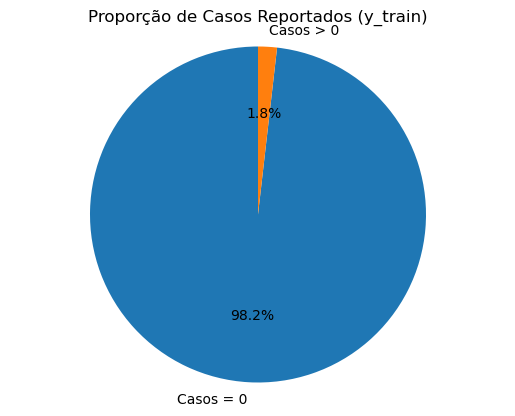

In [23]:
# Quantidade total de casos
import matplotlib.pyplot as plt

print(f"Quantidade total de linhas no conjunto de treino: {y_train.size}")
print(f"Quantidade total de casos de dengue no conjunto de treino: {y_train.sum()}")

# Proporção de zeros e não-zeros
zero_count = (y_train == 0).sum()
non_zero_count = (y_train > 0).sum()
labels = ['Casos = 0', 'Casos > 0']
sizes = [zero_count, non_zero_count]

# Gráfico de pizza
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Proporção de Casos Reportados (y_train)')
plt.show()